Alleyah Pauline C. Manalili

# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
Shape of DataFrame: (303, 14)
Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    fl

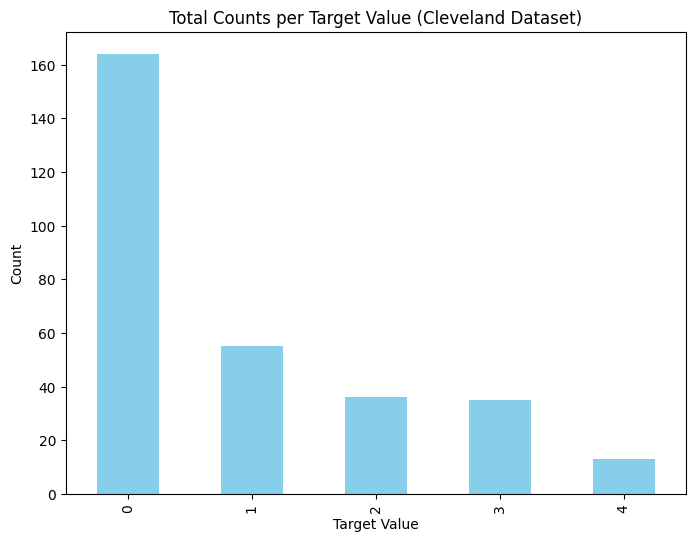

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cleveland_data = pd.read_csv("processed.cleveland.data", header=None, na_values="?", encoding='ISO-8859-1')

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

cleveland_data.columns = column_names

print(cleveland_data.head())

print("Shape of DataFrame:", cleveland_data.shape)
print("Information about the DataFrame:")
print(cleveland_data.info())

plt.figure(figsize=(8, 6))
cleveland_data['target'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Total Counts per Target Value (Cleveland Dataset)')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

This is the total counts per target value. In Cleveland, there are more instances where the "num" or diagnosis of the heart disease is at 0.

**TASK: Create a pairplot that displays the relationships between the following columns:**

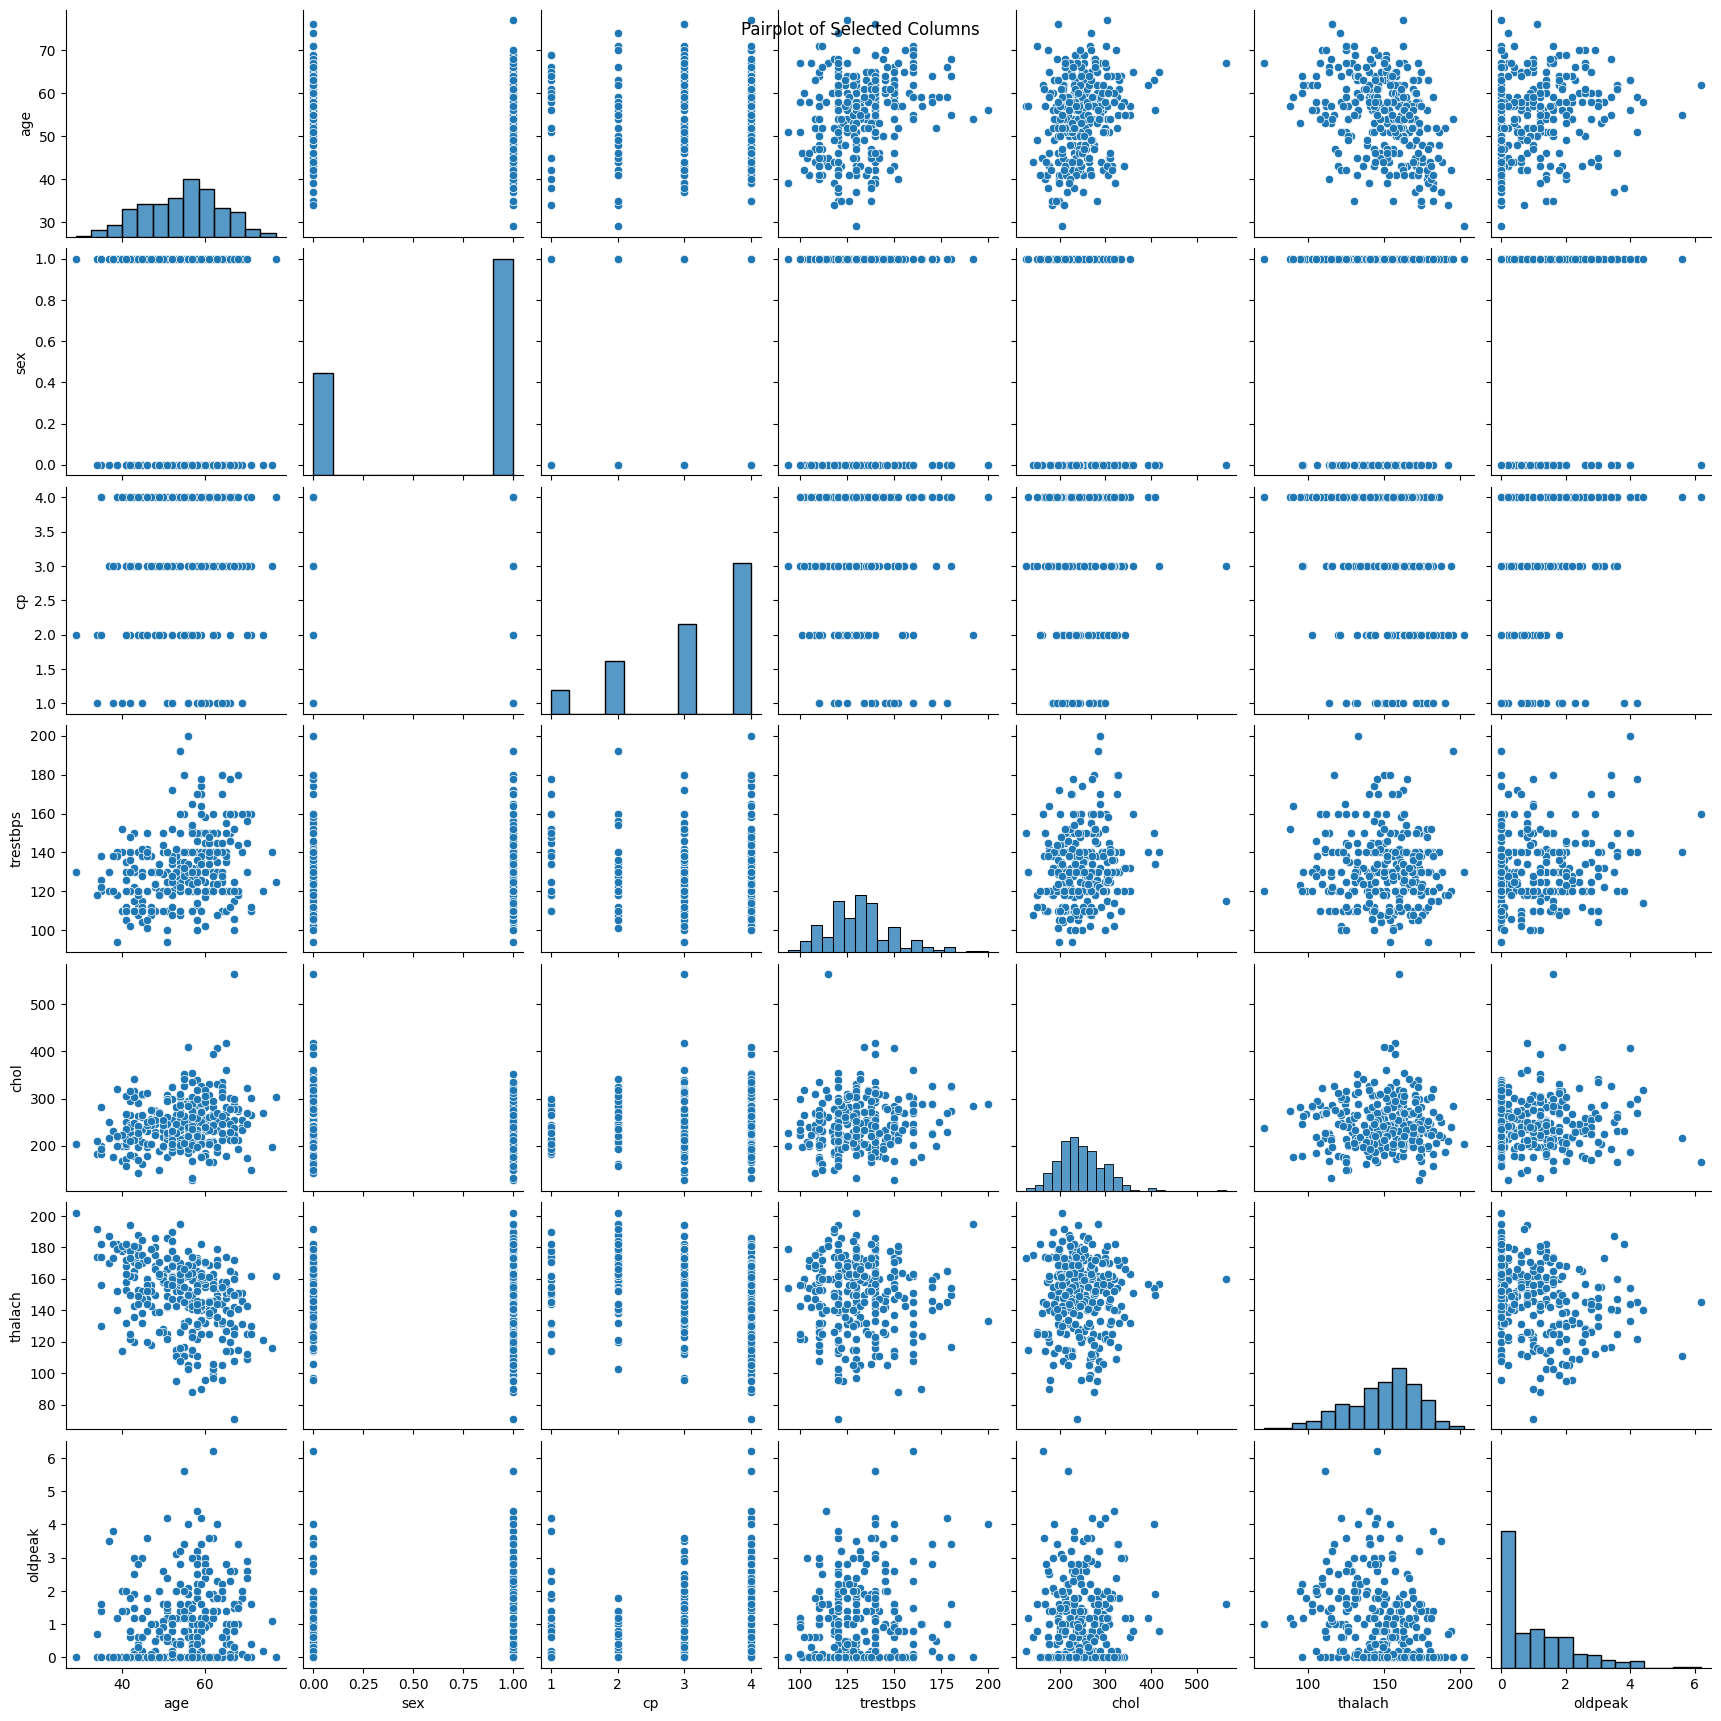

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ["age", "sex", "cp", "trestbps", "chol", "thalach", "oldpeak"]
data_subset = cleveland_data[columns_of_interest].copy()
data_subset.dropna(inplace=True)

sns.pairplot(data_subset)
plt.suptitle("Pairplot of Selected Columns")
plt.show()

In this pairplot, they often come in a single cluster with minimal outliers. They have high correlation. There are also graphs with lines, which may mean categorical encoding.

**TASK: Create a heatmap that displays the correlation between all the columns.**

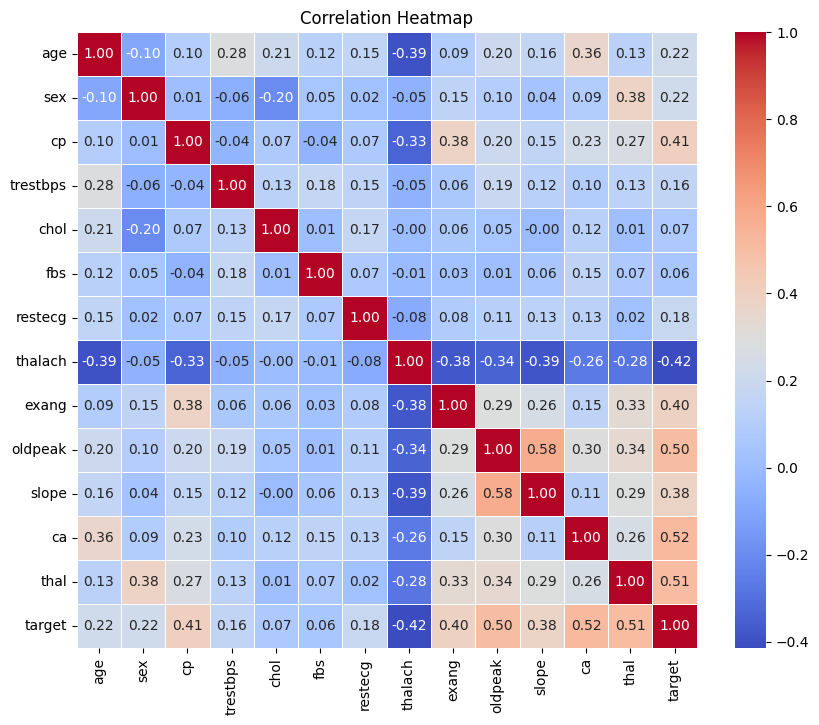

In [3]:
plt.figure(figsize=(10, 8))
correlation_matrix = cleveland_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

thal, ca, and old peak have higher correlation with target. old peak and slope also achieved a higher correlation.

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [4]:
X = cleveland_data.drop("target", axis=1)  
y = cleveland_data["target"]  

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)

log_reg_cv.fit(X_train_imputed, y_train)

print("Best C value:", log_reg_cv.C_[0])

Best C value: 21.54434690031882


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [8]:
print("Best C value:", log_reg_cv.C_[0])

Best C value: 21.54434690031882


### Coeffecients

**TASK: Report back the model's coefficients.**

In [9]:
coefficients = log_reg_cv.coef_
print("Model Coefficients:", coefficients)

Model Coefficients: [[ 5.52006605e-02 -3.68048647e-01 -5.82755952e-01 -3.73345003e-01
  -2.97364375e-01  2.29055387e-01 -1.55897483e-01  2.46027938e-01
  -3.98381421e-01 -4.63364007e-01 -4.49180275e-01 -1.18465203e+00
  -7.74032296e-01]
 [-1.71486648e-02  1.48950834e-01 -1.62084738e-01  1.87158100e-02
   9.53140658e-02 -3.57802353e-01  4.22190265e-02 -2.40457284e-02
   3.78942620e-02 -4.43705892e-01 -1.12920205e-01 -1.94580196e-01
  -1.91422113e-01]
 [ 1.63450531e-01 -2.74395764e-02  3.42449089e-01  4.36348822e-02
   2.74224645e-01  2.48320630e-01 -3.99589919e-01 -1.52956218e-01
   1.57145932e-01  2.89956232e-01 -9.83156083e-04  2.00298477e-01
   2.05083427e-01]
 [-3.66894412e-01 -1.91524969e-01  7.19261705e-02  5.20269168e-02
  -5.52158547e-02  1.91798605e-01  1.10826162e-01 -3.38224861e-01
   1.98657229e-01  2.95457638e-01  8.83173461e-02  5.40987238e-01
   4.56506993e-01]
 [ 1.65391885e-01  4.38062359e-01  3.30465430e-01  2.58967394e-01
  -1.69584808e-02 -3.11372270e-01  4.02442214e

**Task: Create a visualization of the coefficients.**

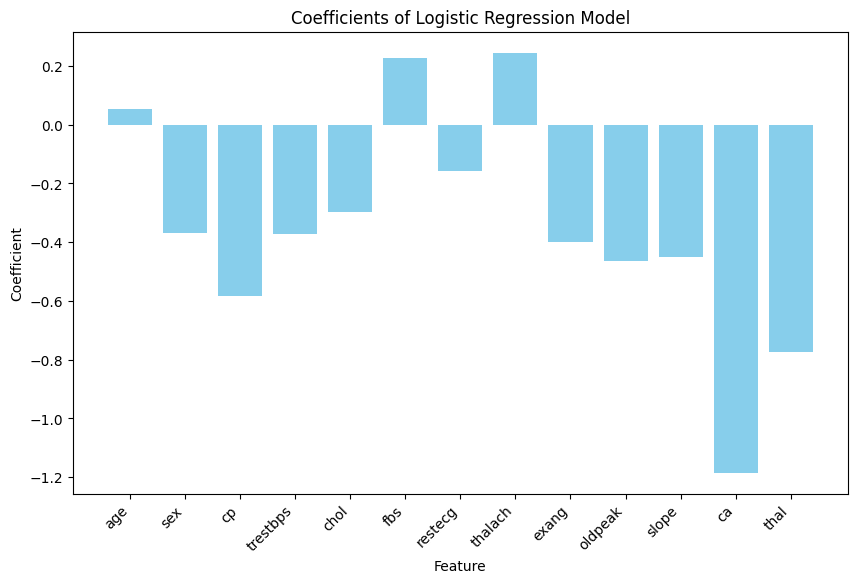

In [10]:
coefficients = log_reg_cv.coef_[0]

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Logistic Regression Model')
plt.xticks(rotation=45, ha='right')
plt.show()

age, fbs, and thalach have higher coefficients than the rest of the features.

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

Confusion Matrix Array:
[[5 1 1 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 0 1]]


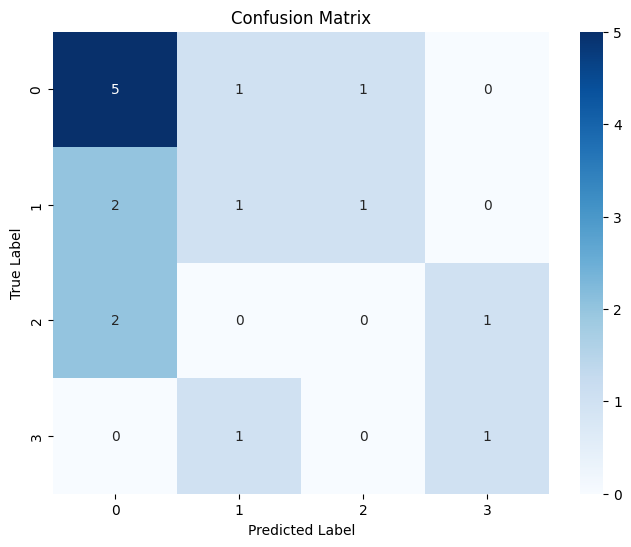


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         3
           3       0.50      0.50      0.50         2

    accuracy                           0.44        16
   macro avg       0.35      0.37      0.35        16
weighted avg       0.39      0.44      0.41        16



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg_cv.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Array:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Based on the confusion matrix, the model's prediction aligns well with the true label in the 0, as it has reached 5 in degree. 

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [12]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Training set class distribution:
target
0    157
1     51
3     33
2     33
4     13
Name: count, dtype: int64

Test set class distribution:
target
0    7
1    4
2    3
3    2
Name: count, dtype: int64


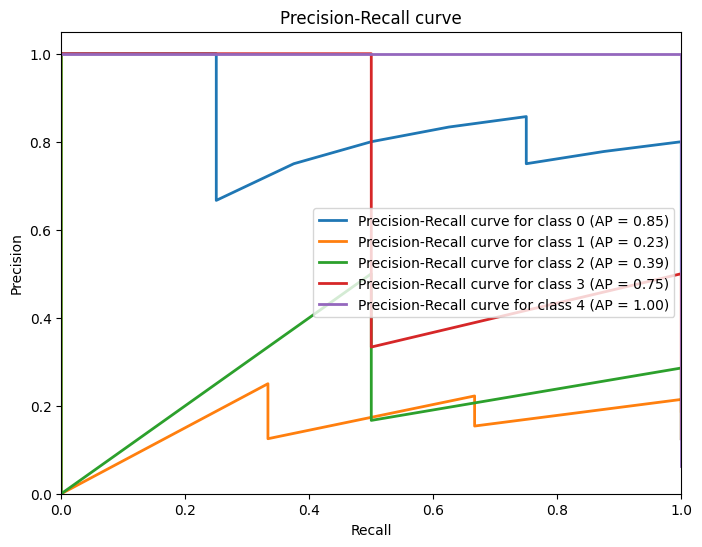

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

X = cleveland_data.drop("target", axis=1)
y = cleveland_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Train Logistic Regression model with Cross-Validation
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)
log_reg_cv.fit(X_train_scaled_imputed, y_train)

ovr = OneVsRestClassifier(log_reg_cv)
ovr.fit(X_train_scaled_imputed, y_train)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(ovr.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == ovr.classes_[i], ovr.decision_function(X_test_scaled_imputed)[:, i])
    average_precision[i] = average_precision_score(y_test == ovr.classes_[i], ovr.decision_function(X_test_scaled_imputed)[:, i])

plt.figure(figsize=(8, 6))
for i in range(len(ovr.classes_)):
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve for class {0} (AP = {1:0.2f})'.format(ovr.classes_[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

Class 0 and 4 have relatively higher precision, making it better in performance than other classes.